In [22]:
# Libraries needed for the project

import pandas as pd
import requests
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
%matplotlib inline

In [32]:
df = pd.read_csv("C:/Users/jranj/OneDrive/Documents/GitHub/personal01/Food Truck/itemsall.csv")

In [33]:
df

,Date,Time,Time Zone,Category,Item,Qty,Price Point Name,SKU,Modifiers Applied,Gross Sales,...,Device Name,Notes,Event Type,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID,Unit,Count
0,12/23/2018,12:48:53,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$21.00,...,NaN,NaN,Payment,Authentic by Zee,NaN,ET95G97MHS02PYQGZCJWEYVM8W,Raymond Ferreri,NaN,ea,1
1,12/22/2018,11:46:37,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$17.50,...,NaN,NaN,Payment,Authentic by Zee,NaN,9FY2KQCGFX3E7A6SR5D0YPWCSM,Michael Fricchione,NaN,ea,1
2,12/22/2018,11:36:57,Eastern Time (US & Canada),None,Jerk Chicken,1,Regular,NaN,NaN,$6.50,...,NaN,Juicy Grilled Leg Quarters steamed down in the...,Payment,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,William Wharton,NaN,ea,1
3,12/22/2018,11:36:57,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$5.00,...,NaN,NaN,Payment,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,William Wharton,NaN,ea,1
4,12/22/2018,11:36:57,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$3.00,...,NaN,NaN,Payment,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,William Wharton,NaN,ea,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1/18/2020,17:31:05,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$12.00,...,NaN,NaN,Payment,Authentic by Zee,NaN,PRM3K7R095615917Q1YEACJV58,Tineya Dixon,NaN,ea,1
1448,1/18/2020,16:53:47,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$20.00,...,NaN,NaN,Payment,Authentic by Zee,NaN,46S6T7DQN14VF5YB9PHVATZVX8,support@uniquelyflawedcollections.com,NaN,ea,1
1449,1/18/2020,16:53:47,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$2.00,...,NaN,NaN,Payment,Authentic by Zee,NaN,46S6T7DQN14VF5YB9PHVATZVX8,support@uniquelyflawedcollections.com,NaN,ea,1
1450,1/18/2020,16:31:30,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,$12.00,...,NaN,NaN,Payment,Authentic by Zee,NaN,C8QDZB6PHS08KENWEDWEAWXPCC,NaN,NaN,ea,1


In [35]:
df.Date = pd.to_datetime(df.Date)

In [4]:
df["Gross Sales"] = df["Gross Sales"].str.replace(r'[^0-9\.]','',regex=True)
df["Gross Sales"] = pd.to_numeric(df["Gross Sales"])

In [5]:
df["day_of_week"] = df.Date.dt.day_name()

In [6]:
df["month"] = df.Date.dt.month_name()

In [7]:
df["month_index"] = df.Date.dt.month

<AxesSubplot:>

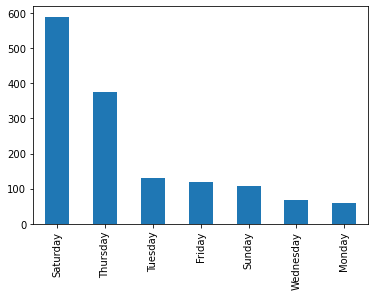

In [8]:
pd.value_counts(df.day_of_week,dropna=False).plot(kind='bar')

C:\Users\jranj\.conda\envs\py3.8\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='day_of_week'>

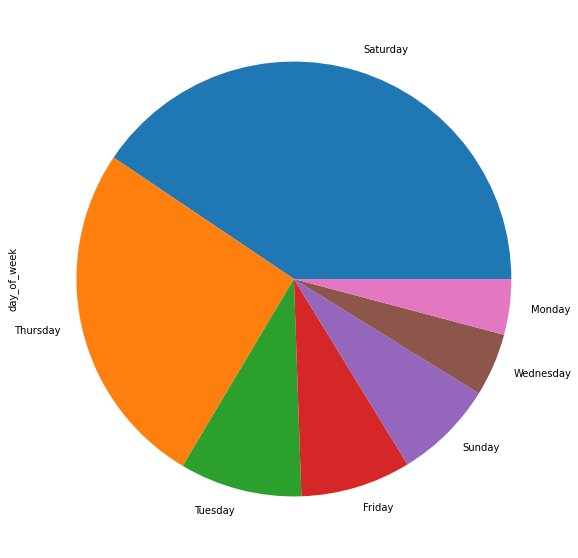

In [9]:
pd.value_counts(df.day_of_week,normalize=True,dropna=False).plot(kind='pie',figsize=(10,10))

In [10]:
sales_data = df.groupby(['month',"month_index"]).agg({"Gross Sales":sum,"Qty":sum}).reset_index().sort_values(by='month_index')

<AxesSubplot:xlabel='month', ylabel='Gross Sales'>

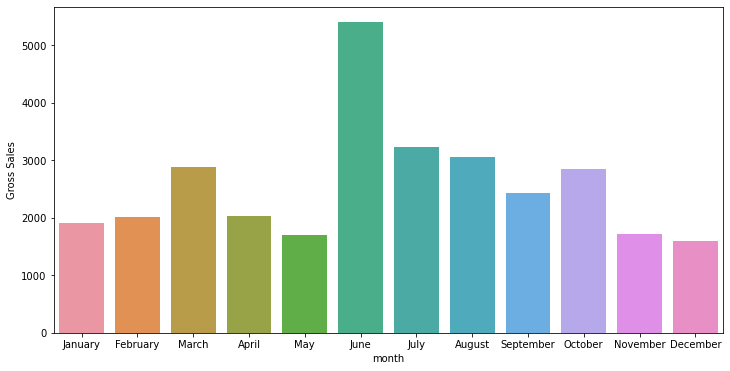

In [13]:
fig_size = (12,6)
fig,ax = plt.subplots(figsize=fig_size)
sns.barplot(x='month',y="Gross Sales",data=sales_data,ax=ax)

<AxesSubplot:xlabel='month', ylabel='Qty'>

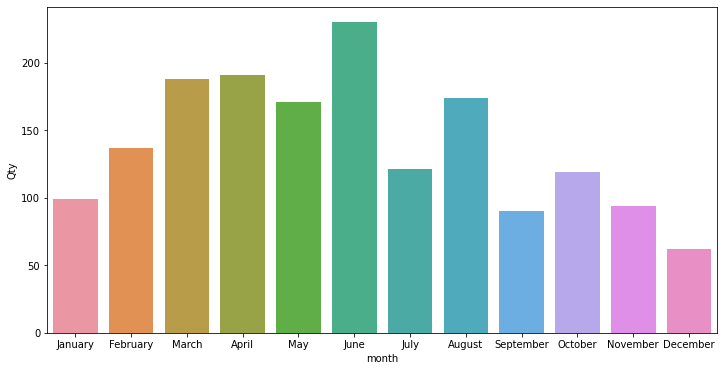

In [14]:
fig_size = (12,6)
fig,ax = plt.subplots(figsize=fig_size)
sns.barplot(x='month',y="Qty",data=sales_data,ax=ax)

In [15]:
df.columns

Index(['Date', 'Time', 'Time Zone', 'Category', 'Item', 'Qty',
       'Price Point Name', 'SKU', 'Modifiers Applied', 'Gross Sales',
       'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Payment ID',
       'Device Name', 'Notes', 'Details', 'Event Type', 'Location',
       'Dining Option', 'Customer ID', 'Customer Name',
       'Customer Reference ID', 'Unit', 'Count', 'day_of_week', 'month',
       'month_index'],
      dtype='object')

In [16]:
day_vs_item = df.groupby(["day_of_week"])["Item"].apply(list).reset_index()

In [19]:
df.Item.value_counts()[df.Item.value_counts() > 25].index.tolist()

['Custom Amount',
 'Jerk Chicken',
 'Chicken Fajitas',
 'BBQ Chicken',
 'Curry chicken',
 'Short Ribs',
 'Wings',
 'Oxtail']

In [20]:
subset = df[df.Item.isin([
 'Jerk Chicken',
 'Chicken Fajitas',
 'BBQ Chicken',
 'Curry chicken',
 'Short Ribs',
 'Wings',
 'Oxtail'])]

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

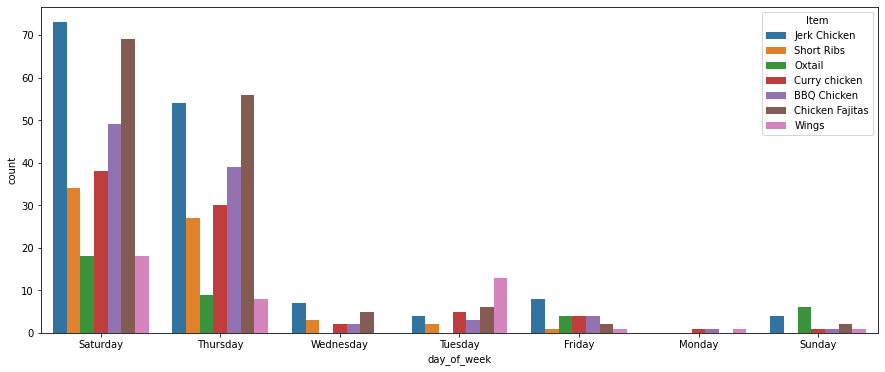

In [21]:
fig_size = (15,6)
fig,ax = plt.subplots(figsize=fig_size)
sns.countplot(x="day_of_week",hue="Item",data=subset,ax=ax)

<AxesSubplot:xlabel='month', ylabel='count'>

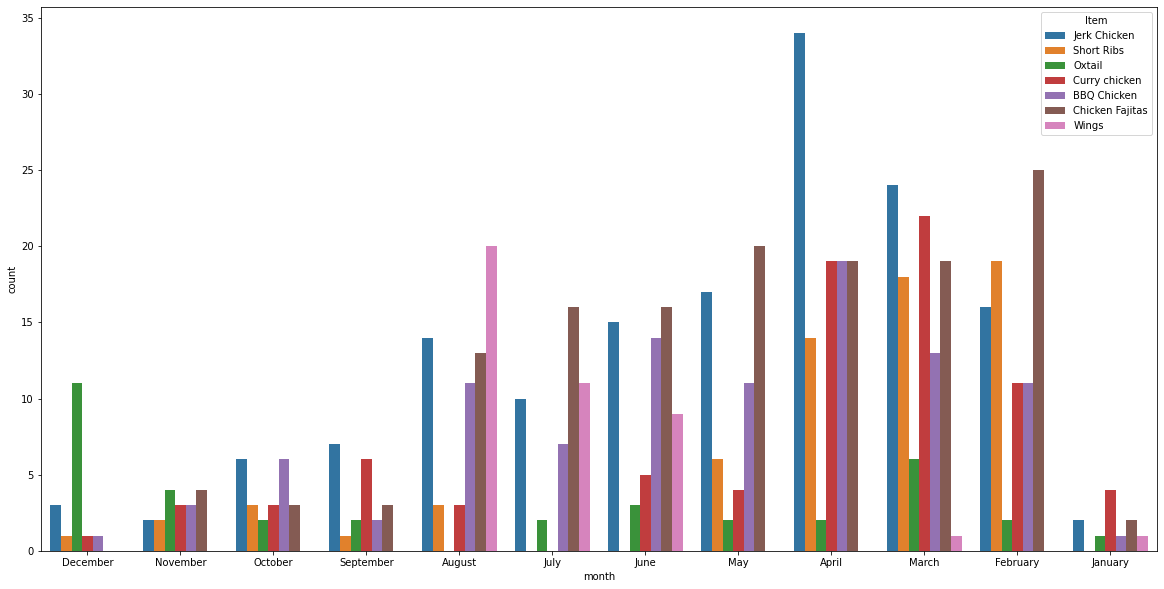

In [22]:
fig_size = (20,10)
fig,ax = plt.subplots(figsize=fig_size)
sns.countplot(x="month",hue="Item",data=subset,ax=ax)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0, 0.5, 'Relative Frequency'), Text(0.5, 0, 'Month')]

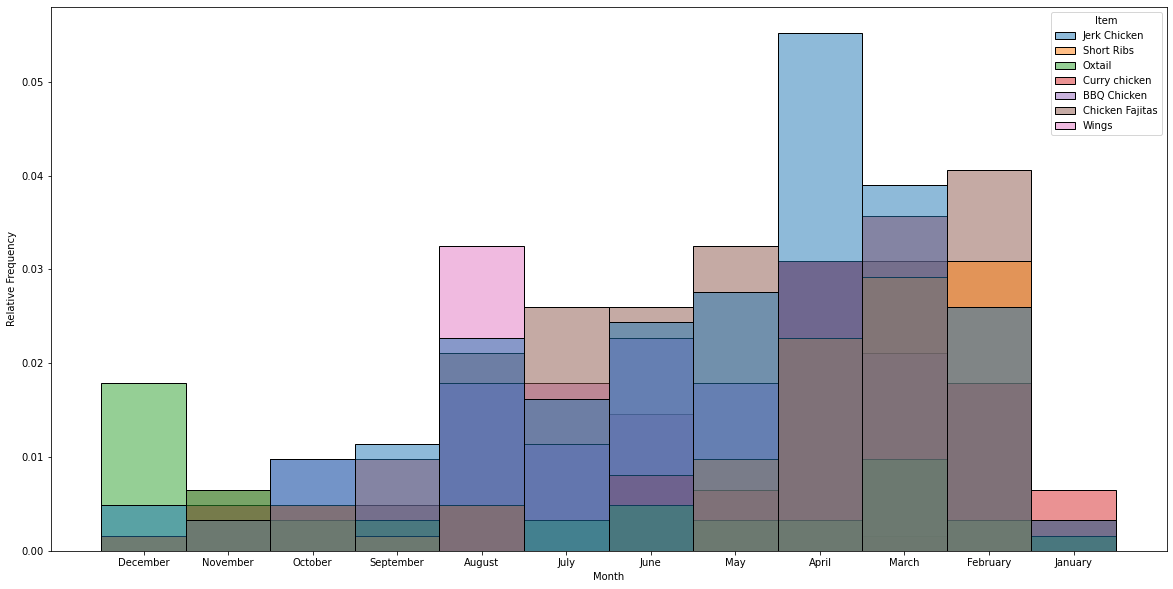

In [45]:
fig_size = (20,10)
fig,ax = plt.subplots(figsize=fig_size)
sns.color_palette("Set1")
plot = sns.histplot(x="month",hue="Item",data=subset,ax=ax,stat="probability",)
plot.set(ylabel="Relative Frequency",xlabel="Month")

In [46]:
subset.to_excel("./ss.xlsx")

In [47]:
df.columns

Index(['Date', 'Time', 'Time Zone', 'Category', 'Item', 'Qty',
       'Price Point Name', 'SKU', 'Modifiers Applied', 'Gross Sales',
       'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Payment ID',
       'Device Name', 'Notes', 'Details', 'Event Type', 'Location',
       'Dining Option', 'Customer ID', 'Customer Name',
       'Customer Reference ID', 'Unit', 'Count', 'day_of_week', 'month',
       'month_index'],
      dtype='object')

In [48]:
a_Rules = df.groupby("Transaction ID")["Item"].apply(list).reset_index()

In [49]:
a_Rules["n_items"] = a_Rules.Item.apply(len)

In [50]:
a_Rules["Item"] = a_Rules.Item.apply(lambda x:",".join(x))

In [51]:
a_Rules.tail()

,Transaction ID,Item,n_items
1091,ztmAvnVu8ddFYSNUA3rnEWheV,"Jerk Chicken,Curry chicken",2
1092,zvVPd2EXe5t0KmHKY09aXv7eV,Jerk Chicken,1
1093,zvpdNThkyaLHdYrNRA9rIi7eV,Curry chicken,1
1094,zxAYDeNWowtAxoJPUBzG4LpeV,Custom Amount,1
1095,zxenBX8VyDGtV8ZkoXd2XC9eV,"Custom Amount,Jerk Chicken",2


In [52]:
a_Rules.to_csv("./assoc_rule.csv",index=False)

In [53]:
df.head()

,Date,Time,Time Zone,Category,Item,Qty,Price Point Name,SKU,Modifiers Applied,Gross Sales,...,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID,Unit,Count,day_of_week,month,month_index
0,2018-12-23,12:48:53,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,21.0,...,Authentic by Zee,NaN,ET95G97MHS02PYQGZCJWEYVM8W,Raymond Ferreri,NaN,ea,1,Sunday,December,12
1,2018-12-22,11:46:37,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,17.5,...,Authentic by Zee,NaN,9FY2KQCGFX3E7A6SR5D0YPWCSM,Michael Fricchione,NaN,ea,1,Saturday,December,12
2,2018-12-22,11:36:57,Eastern Time (US & Canada),None,Jerk Chicken,1,Regular,NaN,NaN,6.5,...,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,William Wharton,NaN,ea,1,Saturday,December,12
3,2018-12-22,11:36:57,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,5.0,...,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,William Wharton,NaN,ea,1,Saturday,December,12
4,2018-12-22,11:36:57,Eastern Time (US & Canada),None,Custom Amount,1,NaN,NaN,NaN,3.0,...,Authentic by Zee,NaN,J4X9N1NKMN3CCZA27TV71PP1GM,William Wharton,NaN,ea,1,Saturday,December,12


In [56]:
df.Date = df.Date.dt.date

AttributeError: Can only use .dt accessor with datetimelike values

In [55]:
ts = df[["Date","Net Sales"]].copy()

In [34]:
ts.columns = ["ds","y"]

In [35]:
ts.y = ts.y.str.replace(r'[^0-9\.]','',regex=True)

In [36]:
ts.y = pd.to_numeric(ts.y)
ts  = ts.groupby(["ds"])["y"].sum().reset_index()

In [37]:
m = Prophet()

In [43]:
m.fit(ts)

Exception: Prophet object can only be fit once. Instantiate a new object.

In [39]:
future = m.make_future_dataframe(periods=365)

In [40]:
forecast = m.predict(future)

In [41]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
613,2021-12-27,199.652957,-63.131979,329.203919,199.652925,199.652988,-70.418369,-70.418369,-70.418369,-61.164146,-61.164146,-61.164146,-9.254222,-9.254222,-9.254222,0.0,0.0,0.0,129.234588
614,2021-12-28,199.746862,-70.641359,356.597187,199.746830,199.746893,-48.497390,-48.497390,-48.497390,-35.105661,-35.105661,-35.105661,-13.391729,-13.391729,-13.391729,0.0,0.0,0.0,151.249472
615,2021-12-29,199.840768,22.645760,467.832951,199.840735,199.840798,41.548943,41.548943,41.548943,59.130530,59.130530,59.130530,-17.581587,-17.581587,-17.581587,0.0,0.0,0.0,241.389711
616,2021-12-30,199.934673,-31.721550,401.596271,199.934640,199.934704,-23.728339,-23.728339,-23.728339,-1.987840,-1.987840,-1.987840,-21.740499,-21.740499,-21.740499,0.0,0.0,0.0,176.206334
617,2021-12-31,200.028578,-26.422522,408.953949,200.028545,200.028609,-10.543368,-10.543368,-10.543368,15.243831,15.243831,15.243831,-25.787198,-25.787198,-25.787198,0.0,0.0,0.0,189.485211


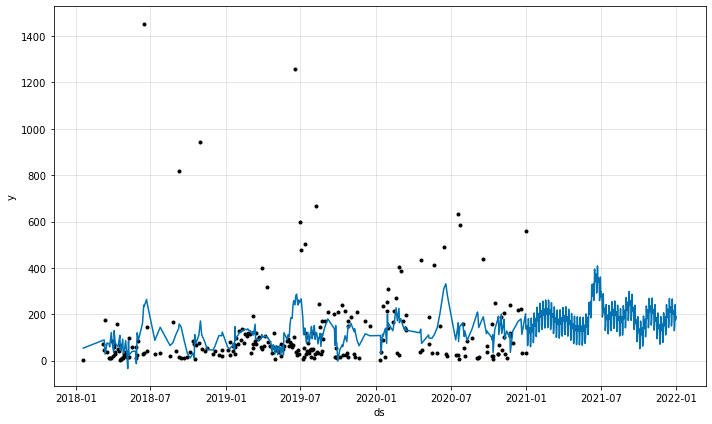

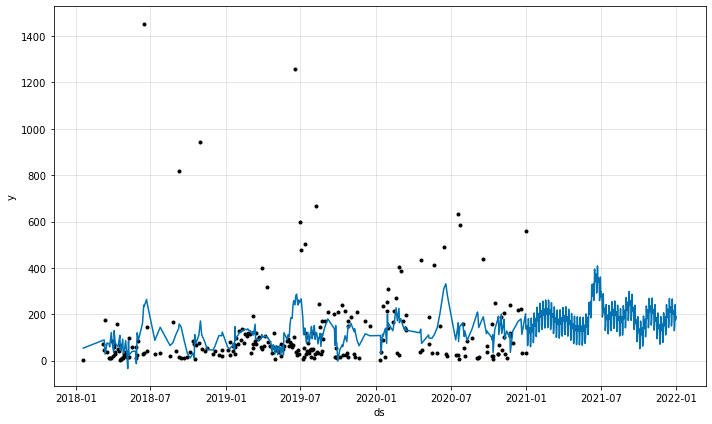

In [50]:
m.plot(forecast,uncertainty=False)

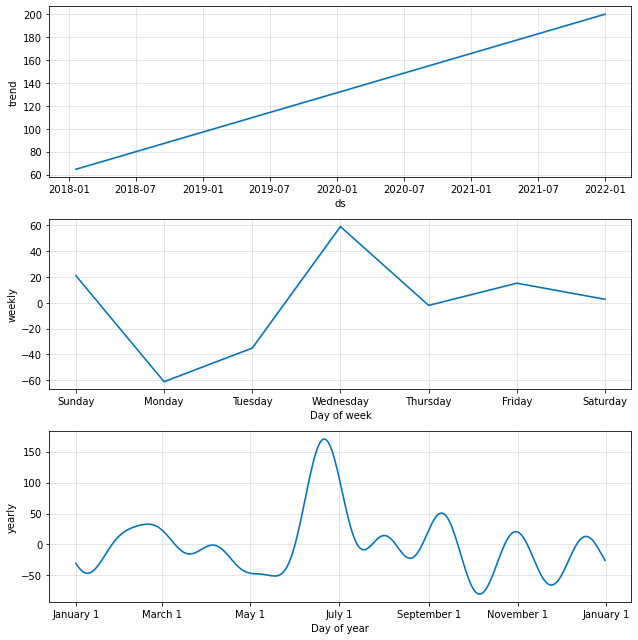

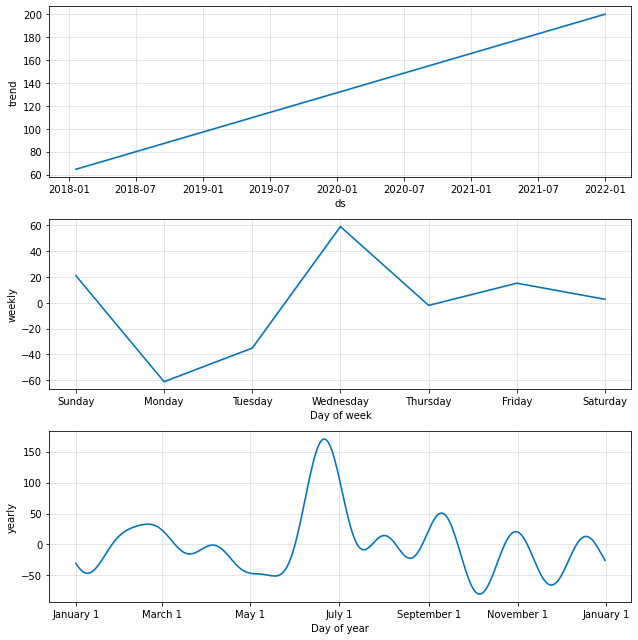

In [151]:
m.plot_components(forecast)

In [42]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='182 days', period='30 days', horizon = '365 days')

INFO:prophet:Making 18 forecasts with cutoffs between 2018-08-09 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/18 [00:00<?, ?it/s]

In [112]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-18,-38847.495444,-39053.583855,-38650.355617,19.00,2018-08-09
1,2018-08-25,-23827.710574,-24039.386026,-23616.330955,165.50,2018-08-09
2,2018-09-01,3683.769134,3471.504257,3891.673238,40.50,2018-08-09
3,2018-09-08,23855.167781,23654.369998,24053.247808,14.00,2018-08-09
4,2018-09-09,24859.699405,24648.859496,25067.716051,820.00,2018-08-09
...,...,...,...,...,...,...
1697,2020-12-12,164.432719,-68.323428,362.409882,218.00,2020-01-01
1698,2020-12-19,147.137279,-67.192824,378.664004,224.00,2020-01-01
1699,2020-12-21,208.207345,10.512054,408.580905,35.00,2020-01-01
1700,2020-12-30,146.453971,-69.324435,354.710784,560.62,2020-01-01


In [113]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days,2.776275e+07,5269.036495,1552.769597,44.630765,1.342618,1.291279,0.617647
1,36 days,3.092682e+07,5561.188496,1694.944812,55.574827,1.342618,1.299321,0.608235
2,37 days,3.092368e+07,5560.906211,1694.971672,55.417997,1.329726,1.303511,0.608824
3,38 days,3.346710e+07,5785.075376,1849.822382,60.629278,1.342618,1.331912,0.598824
4,39 days,3.401550e+07,5832.281108,1918.706108,69.059430,1.422160,1.348738,0.597059
...,...,...,...,...,...,...,...,...
326,361 days,6.514455e+06,2552.343013,909.452977,33.375511,3.642085,1.453509,0.480000
327,362 days,1.007571e+07,3174.226434,1047.610360,38.043984,3.678120,1.455611,0.475294
328,363 days,1.005790e+07,3171.418977,1042.520431,37.861495,3.642085,1.446392,0.476471
329,364 days,1.536028e+07,3919.219496,1215.978997,37.686732,3.281668,1.453711,0.469412
